# Lecture 3-3: Geometric Transformations

## 0.- Initialize filesystem and libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image, display

## 1.- Introduction

**Geometric transformations** involve **altering the spatial relationships of pixels in an image**, and can be broadly categorized into two types: **affine** transformations and **non-affine** transformations.

Affine transformations include operations such as translation, rotation, scaling, reflection, and shear. These transformations **preserve points, straight lines, and planes, as well as the ratios of distances between points** lying on a straight line.

On the other hand, non-affine transformations refer to operations that **do not strictly preserve** these geometric properties, such as **cropping and interpolation**.

## 2.- Affine Transformations

An **affine transformation** applied to an image refers to a geometric transformation that **preserves points, straight lines, planes, and parallelism**, but **not** necessarily Euclidean **distances and angles**.

It **maps** points, lines, and planes to points, lines, and planes, respectively, **preserving** the **ratios** of the lengths of parallel line segments, but **not** the **angles** between lines or the **distances** between points.

After the transformation, **points belonging to a line still lie on that line**, and parallel lines **maintain their condition of parallelism**.

Affine transformations of digital images consist of **two steps**:

* spatial **transformation of coordinates**,

* intensity **interpolation** to assign **intensity values** to the spatially transformed pixels.

Total transformation of an image can involve **only one or several** individual transformations.

Affine transformations are usually defined in **matrix form**. As reference, the **identity transformation** provides the same image or coordinates than the original, and is defined as:

$$
\begin{pmatrix}
x' \\
y' \\
1
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
$$

which corresponds to the equations:

$$x'=x$$
$$y'=y$$

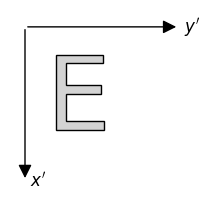

Figure 1: Affine transformation: identity.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/AffTransf_Identity.png'
display(Image(filename=image_path, width=300))
caption = '<p style="text-align: left;">Figure 1: Affine transformation: identity.</p>'
display({'text/html': caption}, raw=True)

**Applications in medical imaging**

Affine transformations are widely used in medical image processing for **aligning images**. Some common applications are:

*	**Monitoring changes over time**, aligning images taken at different times to observe the growth or reduction of abnormalities, such as tumors.

* 3D reconstruction: **aligning slices** in volumetric imaging, like MRI or CT scans, **to reconstruct 3D models** of anatomical structures.

*	Standardizing images, to establish a **common coordinate system and reference frame** before extracting features for machine learning and pattern recognition tasks.

*	Multi-modality fusion: **combining images from different modalities**, such as CT and MRI, especially when the shape of the body part does not change shape between scans.

*	**Preprocessing for non-rigid transformations** (elastic or deformable registration that allows different parts of the image to transform independently): aligning images to adjust the positions of pixels or voxels in anatomical structures before applying non-rigid transformations.





### 2.1. Translation

Translation **shifts an image** along the axes $(x-, y-, z-)$ from one location to another **without altering its shape, size, or orientation**.

In 2D images, it involves **moving every point** of an image by **the same distance** in a given direction, along one or both axes independently.

Mathematically, translation is defined by a vector $(t_x,t_y)$ that accounts for the displacement of a point $(x,y)$ to a new location $(x',y')$, so that:

$$x' = x + t_x$$
$$y' = y + t_y$$

or, in terms of a matrix transformation, which is how affine transformations are expressed usually:

$$
\begin{pmatrix}
x' \\
y' \\
1
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
$$

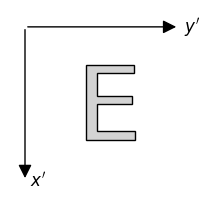

Figure 2: Affine transformation: translation.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/AffTransf_Translation.png'
display(Image(filename=image_path, width=300))
caption = '<p style="text-align: left;">Figure 2: Affine transformation: translation.</p>'
display({'text/html': caption}, raw=True)

In OpenCV, two functions can be used for affine transformations:

*	`cv2.warpAffine()`: uses a 2x3 matrix for affine transformations (translation, rotation, scaling, etc.).
*	`cv2.warpPerspective()`: uses a 3x3 matrix for perspective transformations, which can include more complex distortions beyond simple affine transformations.

Image dimensions: 524 rows x 630 cols


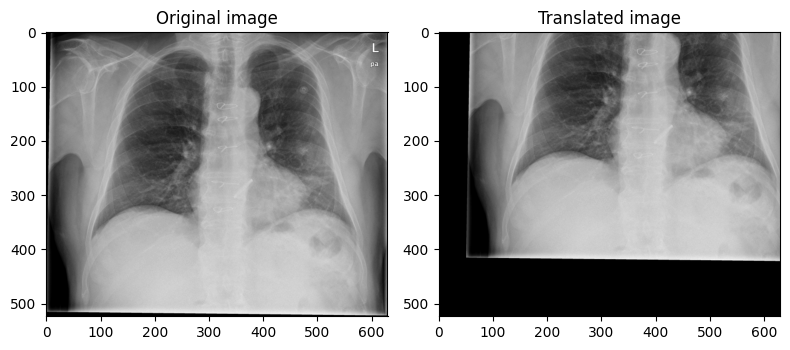

In [ ]:
# Load the image from the local file system
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Read and print the dimensions of the image
rows, cols = image.shape
print(f"Image dimensions: {rows} rows x {cols} cols") # print with f-string

# Define the 2x3 translation matrix
tx, ty = 50, -100  # Horizontal and vertical translation
M = np.float32([
    [1, 0, tx],
    [0, 1, ty]
])

# Apply the affine transformation using the 2x3 matrix M with cv2.warpAffine
# cv2.warpAffine() is used to perform an affine transformation on the image
# Parameters:
# - image: input image to be transformed
# - M: 2x3 transformation matrix that defines the affine transformation
# - (cols, rows): size of the output image
# - borderValue=0: sets the color for pixels that fall outside the boundaries of the original
#   image after the transformation (a value of 0 means these areas will be filled with black pixels)
translated_image = cv2.warpAffine(image, M, (cols, rows), borderValue=0)

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# Display the translated image
plt.subplot(1, 2, 2)
plt.title("Translated image")
plt.imshow(translated_image, cmap='gray', vmin=0, vmax=255)

# Show the images
plt.tight_layout()
plt.show()

Image dimensions: 524 rows x 630 cols


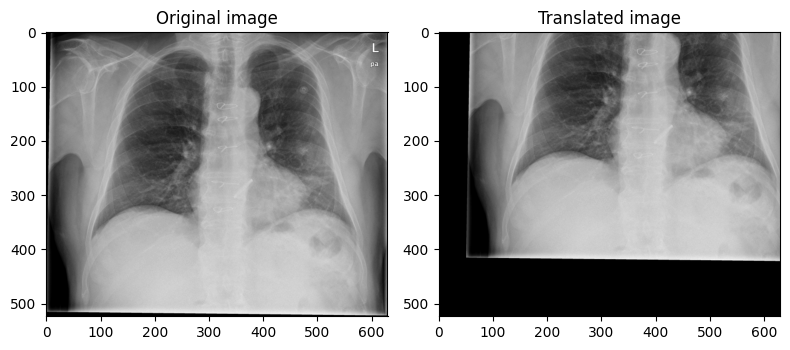

In [ ]:
# Load the image from the local file system
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Read and print the dimensions of the image
rows, cols = image.shape
print(f"Image dimensions: {rows} rows x {cols} cols")

# Define the 3x3 translation matrix
tx, ty = 50, -100 # horizontal and vertical translation
M = np.float32([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]])

# Apply the perspective transformation using the 3x3 matrix M
# cv2.warpPerspective() is used to perform a perspective transformation on the image
# Parameters:
# - image: input image to be transformed
# - M: 3x3 transformation matrix defining the perspective or affine transformation
# - (cols, rows): size of the output image, defined by the number of columns (width) and rows (height)
# - borderValue=0: value to be used for pixels that are outside the boundaries of the original image
translated_image = cv2.warpPerspective(image, M, (cols, rows), borderValue=0)

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# Display the translated image
plt.subplot(1, 2, 2)
plt.title("Translated image")
plt.imshow(translated_image, cmap='gray', vmin=0, vmax=255)

# Show the images
plt.tight_layout()
plt.show()

### 2.2. Rotation

Rotation is defined as the process of **changing the radial orientation** of an image along the axes **around a fixed point** (the origin).

Rotation **preserves the shape and size** of the objects in the image, **maintaining the angles** between lines **and the relative proportions** of the object remain unchanged.

Counterclockwise rotation of an image around the origin by an angle $\theta$ is given by the equations:

$$
x' = x \cos \theta - y \sin \theta \\
y' = x \sin \theta + y \cos \theta
$$

and, in matrix form:

$$
\begin{pmatrix}
x' \\
y' \\
1
\end{pmatrix}
=
\begin{pmatrix}
\cos \theta & -\sin \theta & 0 \\
\sin \theta & \cos \theta & 0 \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
$$

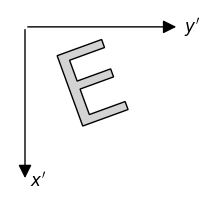

Figure 3: Affine transformation: rotation.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/AffTransf_Rotation.png'
display(Image(filename=image_path, width=300))
caption = '<p style="text-align: left;">Figure 3: Affine transformation: rotation.</p>'
display({'text/html': caption}, raw=True)

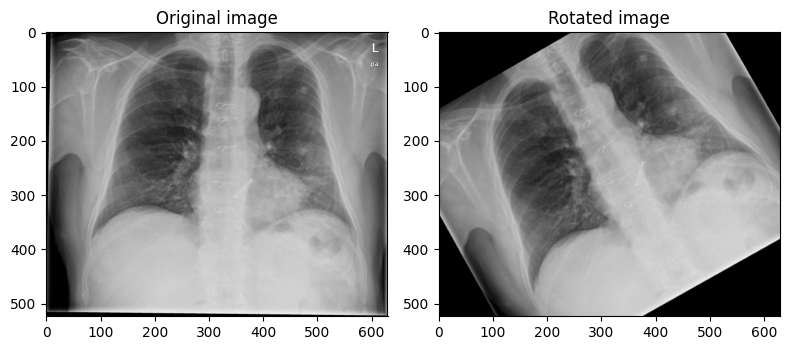

In [5]:
# Load the image from the local file system
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Rotation using OpenCV
angle = 30  # Angle of rotation
rows, cols = image.shape  # Get the dimensions of the image

# Calculate the rotation matrix
# The center of rotation is the center of the image (cols/2, rows/2)
# scale=1 means no scaling is applied during rotation
M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)

# Apply the rotation using warpAffine
rotated_image = cv2.warpAffine(image, M, (cols, rows), borderValue=0)

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# Display the rotated image
plt.subplot(1, 2, 2)
plt.title("Rotated image")
plt.imshow(rotated_image, cmap='gray', vmin=0, vmax=255)

# Show all results
plt.tight_layout()
plt.show()

Other libraries, such as **SciPy**, also include functions similar to those in OpenCV, and sometimes offer a **simpler syntax**.

This is the case of `scipy.ndimage.rotate`, which results in shorter code in case the original image should not be cropped after the rotation.

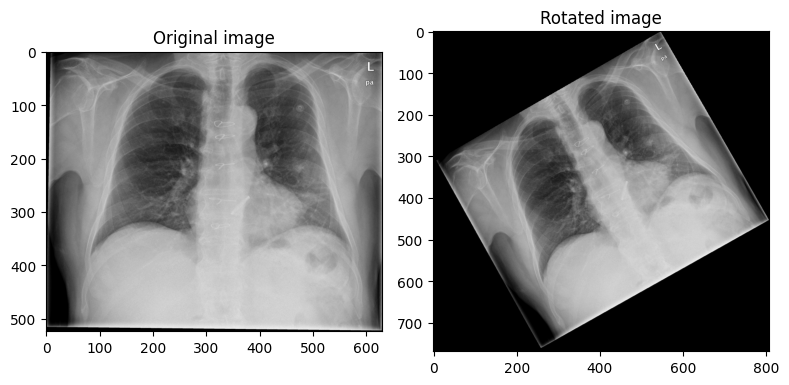

In [ ]:
import scipy.ndimage

# Load the image from the local file system
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Rotation
# The reshape parameter controls whether the output image is resized to fit
# the entire rotated image (True) or if it keeps the original dimensions,
# cropping the image where it extends beyond the original boundaries (False).
rotated_image = scipy.ndimage.rotate(image, angle=30, reshape=True, cval=0)

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# Display the rotated image
plt.subplot(1, 2, 2)
plt.title("Rotated image")
plt.imshow(rotated_image, cmap='gray', vmin=0, vmax=255)

# Show all results
plt.tight_layout()
plt.show()

### 2.3. Scaling

Scaling involves **resizing an image or a geometric object by a scaling factor**, which **can be different along different axes**.

This transformation **changes the distance between points** in one or more axes but **preserves its shape** (angles between lines and relative proprotions) **and orientation**.

Scaling is defined by **two scaling factors**, $c_x$ and $c_y$, along the x and y axes, respectively. The transformed image will be larger or smaller depending on the scaling factors ($c<1$ or $c>1$, respectively).

If $c_x = c_y$, then the transformed image will maintain the aspect ratio (**uniform scaling**); otherwise, it will appear elongated or compressed in one axis with respect to the other (**non-uniform scaling**).

$$x' = c_x x$$
$$y' = c_y y$$

In terms of transforming matrices, scaling is defined as:

$$
\begin{pmatrix}
x' \\
y' \\
1
\end{pmatrix}
=
\begin{pmatrix}
c_x & 0 & 0 \\
0 & c_y & 0 \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
$$

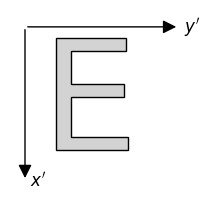

Figure 4: Affine transformation: scaling.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/AffTransf_Scaling.png'
display(Image(filename=image_path, width=300))
caption = '<p style="text-align: left;">Figure 4: Affine transformation: scaling.</p>'
display({'text/html': caption}, raw=True)

To compute the value of the **new pixels**, **interpolation** is used. Depending on the method (nearest-neighbor, bilinear, bicubic, ...), the new values may **differ** from the original ones. By default, it uses bilinear interpolation (`cv2.INTER_LINEAR`, see Interpolation section below).

Image dimensions (original): 524 rows x 630 cols
Image dimensions (scaled, 0.5x): 262 rows x 315 cols

[[107 127 125 127 127 131 141 140 144 148]
 [107 125 127 124 127 142 147 143 144 145]
 [113 123 125 134 141 145 144 142 144 144]
 [113 125 130 135 141 141 147 144 146 147]
 [118 124 125 133 137 139 146 143 144 150]
 [115 121 122 129 133 132 136 143 146 154]
 [110 118 121 128 135 132 128 135 144 152]
 [111 115 118 122 136 137 130 129 130 141]
 [110 112 112 118 129 132 131 131 121 132]
 [110 110 111 112 119 126 125 120 115 126]]
[[107 125 127 141 144]
 [113 125 141 144 144]
 [118 125 137 146 144]
 [110 121 135 128 144]
 [110 112 129 131 121]]


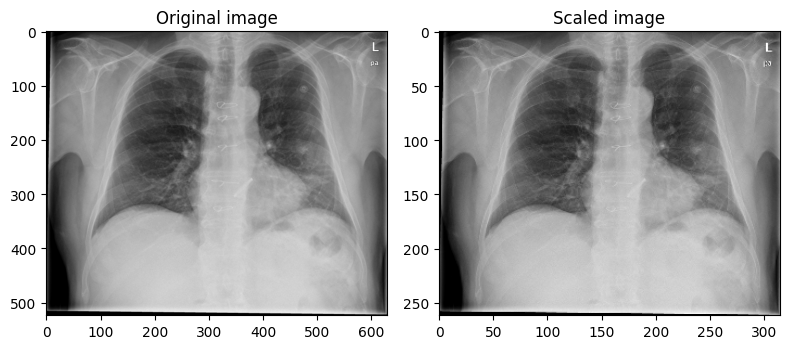

In [11]:
# Load the image from the local file system
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Read and print the dimensions of the image
rows, cols = image.shape
print(f"Image dimensions (original): {rows} rows x {cols} cols")

# Scaling factor
scale_x = 0.5  # Scaling factor in the x-direction
scale_y = 0.5  # Scaling factor in the y-direction

# Define the 2x3 scaling matrix
M = np.float32([
    [scale_x, 0, 0],
    [0, scale_y, 0]
])

# Calculate the new dimensions of the scaled image
new_cols = int(cols * scale_x) # round down to convert the value to an integer
new_rows = int(rows * scale_y)

# Apply the scaling using warpAffine, with bicubic interpolation
scaled_image = cv2.warpAffine(image, M, (new_cols, new_rows),
                              flags=cv2.INTER_CUBIC, borderValue=0)

# Read and print the dimensions of the scaled image
rows, cols = scaled_image.shape
print(f"Image dimensions (scaled, 0.5x): {rows} rows x {cols} cols\n")

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# Display the scaled image
plt.subplot(1, 2, 2)
plt.title("Scaled image")
plt.imshow(scaled_image, cmap='gray', vmin=0, vmax=255)

# Prints two corresponding sub-arrays in the original and scaled images
start_row, end_row = 140, 150
start_col, end_col = 290, 300
print(image[start_row:end_row, start_col:end_col])
print(scaled_image[int(start_row * scale_y):int(end_row * scale_y),
                   int(start_col * scale_x):int(end_col * scale_x)])

# Show all results
plt.tight_layout()
plt.show()

Scaling can also be applied using the function `scipy.ndimage.zoom(image, [c_x, c_y])`, passing as parameters the image and the horizontal and vertical scales.

Image dimensions (original): 524 rows x 630 cols
Image dimensions (scaled, 0.5x): 262 rows x 315 cols

[[107 127 125 127 127 131 141 140 144 148]
 [107 125 127 124 127 142 147 143 144 145]
 [113 123 125 134 141 145 144 142 144 144]
 [113 125 130 135 141 141 147 144 146 147]
 [118 124 125 133 137 139 146 143 144 150]
 [115 121 122 129 133 132 136 143 146 154]
 [110 118 121 128 135 132 128 135 144 152]
 [111 115 118 122 136 137 130 129 130 141]
 [110 112 112 118 129 132 131 131 121 132]
 [110 110 111 112 119 126 125 120 115 126]]
[[116 125 128 142 146]
 [119 130 144 143 144]
 [121 127 136 144 147]
 [114 123 136 129 145]
 [112 113 129 130 122]]


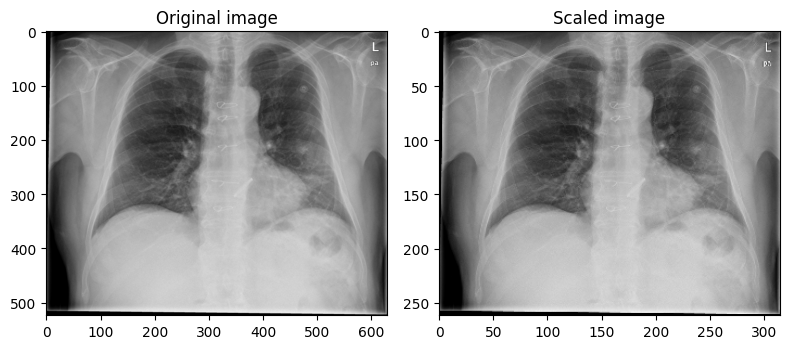

In [9]:
import scipy.ndimage

# Load the image from the local file system
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Read and print the dimensions of the image
rows, cols = image.shape
print(f"Image dimensions (original): {rows} rows x {cols} cols")

# Scaling (zoom=[c_y, c_x])
scaled_image = scipy.ndimage.zoom(image, zoom=[0.5, 0.5])

# Read and print the dimensions of the scaled image
rows, cols = scaled_image.shape
print(f"Image dimensions (scaled, 0.5x): {rows} rows x {cols} cols\n")

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# Display the scaled image
plt.subplot(1, 2, 2)
plt.title("Scaled image")
plt.imshow(scaled_image, cmap='gray', vmin=0, vmax=255)

# Prints two corresponding sub-arrays in the original and scaled images
start_row, end_row = 140, 150
start_col, end_col = 290, 300
print(image[start_row:end_row, start_col:end_col])
print(scaled_image[int(start_row*0.5):int(end_row*0.5), int(start_col*0.5):int(end_col*0.5)])

# Show all results
plt.tight_layout()
plt.show()

### 2.4. Reflection

Reflection simply **flips** an image or geometric object across a specified axis or plane, **creating a mirror image**.

This transformation **changes the orientation** of the object but **preserves its shape and size**.

It correspond to a **particular case of scaling**, where one of the scaling factors is $1$ and the other is $-1$:

*	Reflection across the y-axis (horizontal or left-right flip):

$$
\begin{pmatrix}
x' \\
y' \\
1
\end{pmatrix}
=
\begin{pmatrix}
-1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
$$


*	Reflection across the x-axis (vertical or up-down flip):

$$
\begin{pmatrix}
x' \\
y' \\
1
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
$$

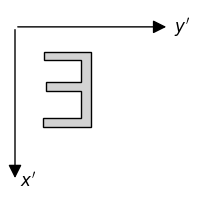

Figure 5: Affine transformation: reflection.

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/AffTransf_Reflection.png'
display(Image(filename=image_path, width=300))
caption = '<p style="text-align: left;">Figure 5: Affine transformation: reflection.</p>'
display({'text/html': caption}, raw=True)

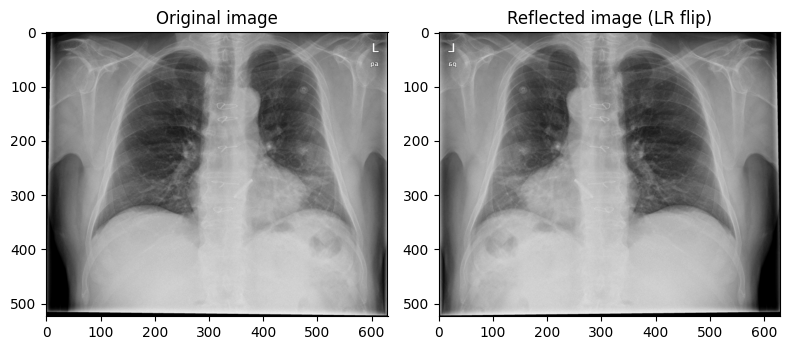

In [ ]:
# Load the image from the local file system
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Horizontal reflection
reflected_image_y = cv2.flip(image, 1) # 1: horizontal flip, 0: vertical flip, -1: diagonal flip

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# Display the reflected image (left-right)
plt.subplot(1, 2, 2)
plt.title("Reflected image (LR flip)")
plt.imshow(reflected_image_y, cmap='gray', vmin=0, vmax=255)

# Show all results
plt.tight_layout()
plt.show()

### 2.5. Shear

Shear is not as common as the previous affine transformations in medical imaging.

However, they can still be useful specific occasions like **geometric corrections** of images (in case they are **distorted**) or **data augmentation** (to provide robustness and **generalization capabilities of deep learning models**).

Mathematically is defined as:

$$x' = x + s_v y$$
$$y' = s_h x + y$$

which corresponds to the transformation matrix:

$$
\begin{pmatrix}
x' \\
y' \\
1
\end{pmatrix}
=
\begin{pmatrix}
1 & s_v & 0 \\
s_h & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
$$

Usually, **only one axis is sheared**: setting $s_h = 0$ corresponds to **vertical shear** (the $y$ component remains unchanged), whereas **horizontal shear** is achieved with $s_v = 0$.

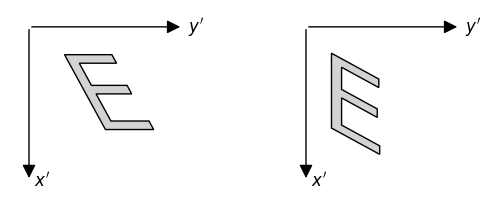

Figure 6: Affine transformation: shear (left: horizontal, right: vertical).

In [ ]:
image_path = '/content/drive/MyDrive/PIM/Images/AffTransf_Shear.png'
display(Image(filename=image_path, width=500))
caption = '<p style="text-align: left;">Figure 6: Affine transformation: shear (left: horizontal, right: vertical).</p>'
display({'text/html': caption}, raw=True)

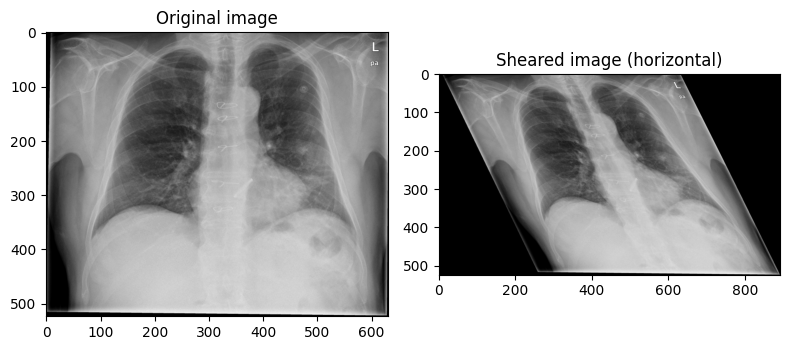

In [13]:
# Load the image from the local file system
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the shear factor
shear_factor = 0.5

# Construct the 3x3 affine transformation matrix for horizontal shear
# (OpenCV considers x-axis increases from left to right and y-axis increases from bottom to up,
# so transformation matrices are transposed from those required for NumPy matrices)
M = np.float32([
    [1, shear_factor, 0],  # Shearing along the x-axis
    [0, 1, 0],             # No change in y-axis
    [0, 0, 1]              # Homogeneous coordinate
])

# Calculate the new bounding dimensions of the image
height, width = image.shape
new_width = width + int(shear_factor * height)

# Apply the affine transformation using cv2.warpPerspective (3x3 matrix)
sheared_image = cv2.warpPerspective(image, M, (new_width, height))

# Display the original and sheared images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title("Sheared image (horizontal)")
plt.imshow(sheared_image, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()
plt.show()

### 2.6. Combination of transformations

Two or more sequential affine transformations can be **combined in a single transformation** by multiplying their respective transformation matrices.

For example, the transformation matrix of a rotation followed by a translation can be performed in a single step with the following transformation matrix:

$$M = T \times R = \begin{pmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{pmatrix}
\times
\begin{pmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{pmatrix}
=
\begin{pmatrix}
\cos\theta & -\sin\theta & t_x \\
\sin\theta & \cos\theta & t_y \\
0 & 0 & 1
\end{pmatrix}$$

Since matrix multiplication is no commutative in general ($A \times B \neq B \times A$), the **order** of the transformations is important and **affects** the final result.

## 3.- Non-affine Transformations

### 3.1. Cropping

Image cropping is **not an affine transformation**; however, it is often included in the workflow of image processing, following or preceding other affine transformations.

Cropping consists on **selecting a rectangular region** from an image (a sub-matrix) and discarding the rest. This process **does not involve any linear transformation or matrix operations**.

Image cropping is useful to achieve the **focus on a specific region** of interest within the transformed image, to **discard unwanted areas** of the image which should not be included in the processing algorithms, or to optimize the size and **reduce the computational load**, making the processing faster.

Since cropping only involves array manipulation (**slicing**), it does not require specialized functions.

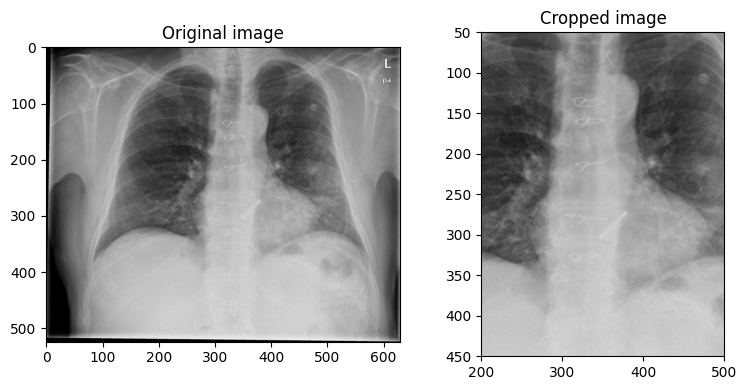

In [ ]:
# Load the image from the local file system
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the crop region (starting column, starting row, width, height)
start_row, height = 50, 400  # Rows, height
start_col, width = 200, 300  # Columns, width

# Crop the image using rows and columns (slicing)
cropped_image = image[start_row:start_row+height, start_col:start_col+width]

# Display the original and cropped images
plt.figure(figsize=(8, 4))

# Original image plot
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('on')  # Show axes

# Cropped image plot with correct axes
plt.subplot(1, 2, 2)
plt.title("Cropped image")
plt.imshow(cropped_image, cmap='gray', vmin=0, vmax=255,
           extent=[start_col, start_col+width, start_row+height, start_row])
# extend labels the axes correctly ([left, right, bottom, top])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### 3.2. Interpolation#

Interpolation is **not an affine transformation**, but a technique used in digital image processing to **estimate pixel values at unknown locations based on known pixel values**.

Except for translation and reflection, other **affine transformations** often **map the coordinates** of the original image **to new coordinates at non-integer positions**, for which **there are not preset values**.

Therefore, **new pixel intensities need to be calculated** for the pixels of the transformed image at coordinates that do not directly correspond to the original image's grid. This is usually computed using **splines**.


#### **Splines**

A **spline** is defined as a **piecewise polynomial function** that is used to approximate or interpolate a set of data points.

Splines are especially useful in **interpolation** because they **provide a smooth curve that can pass through or near the given points**.

A spline is made up of **multiple polynomial segments**, each **defined** within a specific **interval** between data points.

Splines ensure that the **polynomial segments fit together smoothly**, maintaining **continuity** in the function and its derivatives up to a certain degree.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Parametic_Cubic_Spline.svg/1024px-Parametic_Cubic_Spline.svg.png" alt="Caption" width="500"><p style="text-align: center;">Figure 7: Cubic spline. Source: <a href="https://en.wikipedia.org/wiki/Spline_(mathematics)">Wikipedia.</a></p>

According to the **order** of the polynomials, splines can be classified into several types, which give names to the interpolation methods:

* **Nearest-neighbor** interpolation: this method is **not** technically **a spline but a piecewise constant function**.

  It assigns the **value of the nearest pixel** to the new pixel. **No smoothness or continuity** is ensured.
  
  While it is the simplest and **fastest** form of interpolation, it can produce **artifacts** and **pixelated images**, so its use is not recommended.

* **Bilinear** interpolation: uses **linear splines**, which are segments connecting two adjacent data points, for both dimensions.

  This method is simple but can result in **sharp angles** at the data points. The new value is estimated as a **weighted average of the four nearest pixels**.
  
  It produces smoother results than nearest-neighbor interpolation but can introduce some **blurring**.
  
* **Biquadratic** interpolation: it is based on polynomials of **second degree** to estimate the new pixel value. The **function and its first derivative are continuous**.

* **Bicubic** interpolation: considers the 16 nearest pixels and uses **cubic polynomials** to estimate the new pixel value.

  It provides a **good balance** between smoothness and computational efficiency, and so, it is the **standard** used in commercial software for image edition.
  
  It ensures **continuity** in the function and its first and second derivatives.

*	**High-order** (quartic/quintic) interpolation: uses **polynomials of degree 4/5**.

  Used in medical imaging or applications that require very high-quality interpolation, at the cost of high computational complexity.

As the **order** of interpolation **increases**, the resulting image is **smoother**, with **higher-quality**, and with **less artifacts**, but the **computation burden increases**.

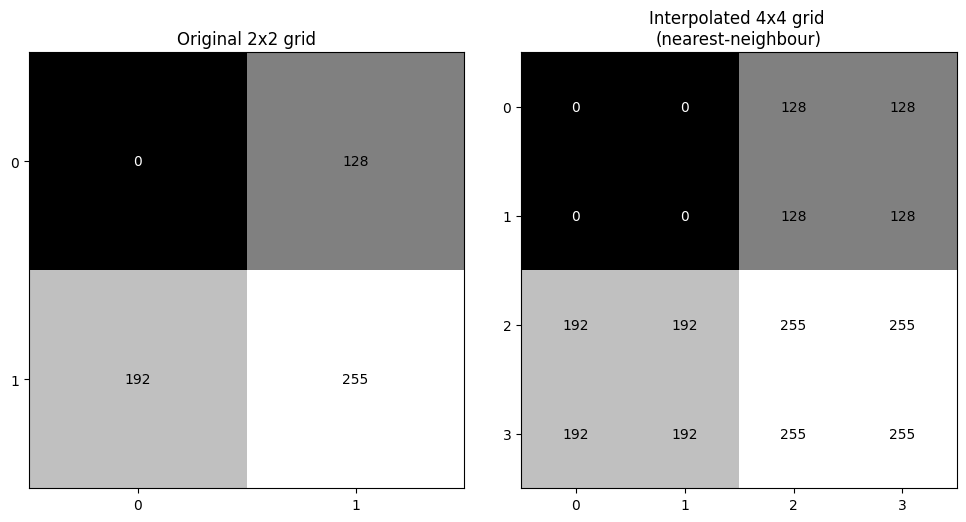

Figure 8: Nearest-neighbor interpolation.

In [15]:
image_path = '/content/drive/MyDrive/PIM/Images/Interpolation_nearest-neighbor.png'
display(Image(filename=image_path, width=800))
caption = '<p style="text-align: left;">Figure 8: Nearest-neighbor interpolation.</p>'
display({'text/html': caption}, raw=True)

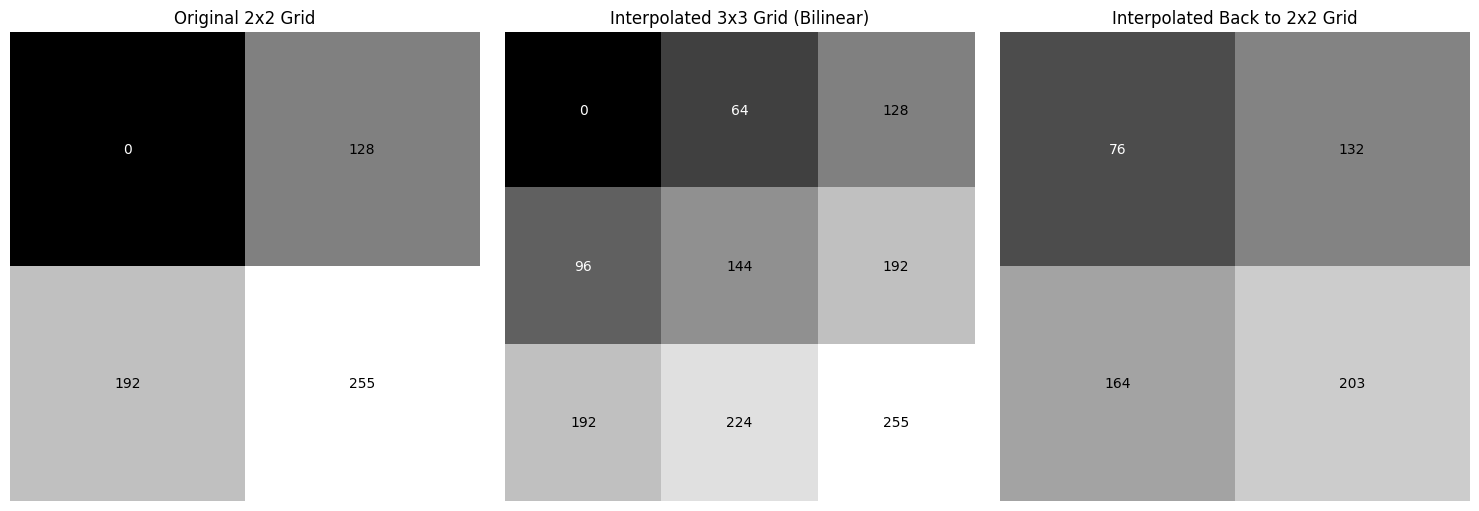

Figure 9: Bilinear interpolation.

In [14]:
image_path = '/content/drive/MyDrive/PIM/Images/Interpolation_bilinear.png'
display(Image(filename=image_path, width=900))
caption = '<p style="text-align: left;">Figure 9: Bilinear interpolation.</p>'
display({'text/html': caption}, raw=True)

For example, in bilinear interpolation:

* Center figure: $I'(0,1) = \dfrac{I(0,0) + I(0,1)}{2} = \dfrac{I'(0,0) + I'(0,2)}{2} = \dfrac{0 + 128}{2} = 64$
* Right figure: $I''(0,0) = \dfrac{I'(0,0) + I'(0,1) + I'(1,0) + I'(1,1)}{4} = \dfrac{0 + 64 + 96 + 144}{4} = 76$

The **functions** used in OpenCV and SciPy to **interpolate** images are:

* `cv2.resize()` (OpenCV): it is used to resize images and supports several interpolation methods. The parameters are:

	* `src`: input image,
	*	`dsize`: output size (width, height),
	*	`fx, fy`: scaling factors along the x and y axes (optional if dsize is provided),
	*	`interpolation`: specifies the interpolation method:
	  *	`cv2.INTER_NEAREST`: nearest-neighbor interpolation (fastest, lower quality),
	  *	`cv2.INTER_LINEAR`: bilinear interpolation (default, balance of speed and quality),
	  *	`cv2.INTER_CUBIC`: bicubic interpolation (better quality for scaling up),
	  *	`cv2.INTER_LANCZOS4`: Lanczos interpolation (higher quality and computationally expensive, best for downscaling, not based on splines).

* `scipy.ndimage.zoom()` (SciPy): its parameters include:

	*	`input`: input image (array),
	*	`zoom`: scalar or sequence defining the zoom factor along each axis,
	*	`order`: specifies the interpolation method (0: nearest-neighbor, 1: bilinear, 2: biquadratic, 3: cubic, 4: quartic, 5: quintic).
	*	`mode`: determines how the input array is extended beyond its boundaries (e.g., 'constant', 'nearest', 'reflect').

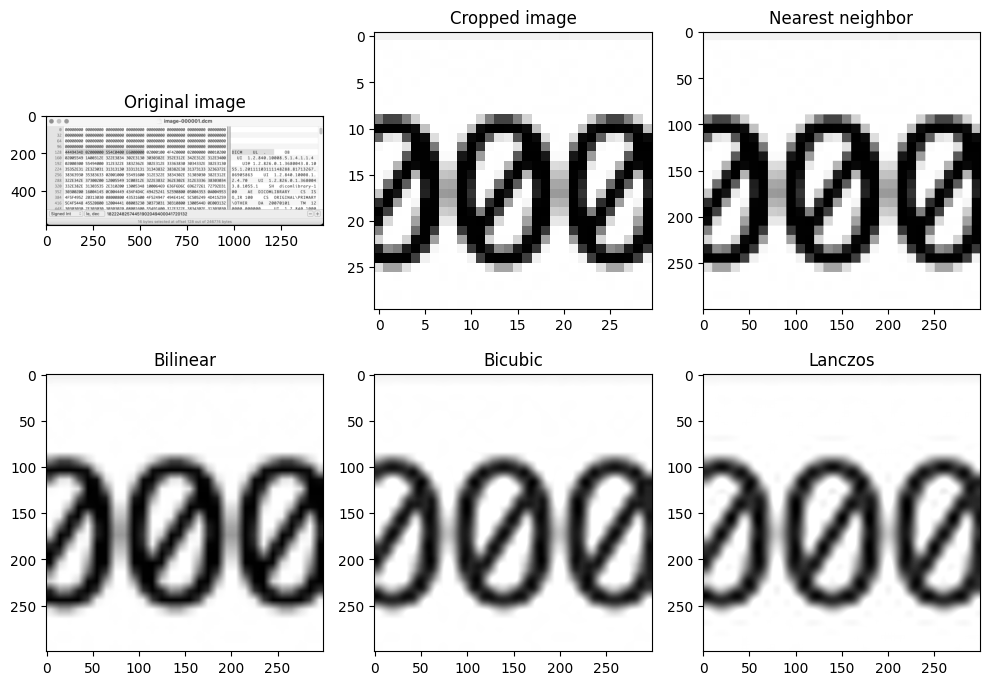

In [ ]:
# Image 1
#image_path = '/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg'
# Define the crop region (columns, rows, width, height)
#start_col, start_row, width, height = 320, 130, 50, 50

# Image 2
image_path = '/content/drive/MyDrive/PIM/Images/DICOM_file_1.png'
# Define the crop region (columns, rows, width, height)
start_col, start_row, width, height = 105, 115, 30, 30

# Load an image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Crop the image (using rows and columns)
cropped_image = image[start_row:start_row + height, start_col:start_col + width]

# Define the scaling factor for upsampling
scale_factor = 10
new_size = (cropped_image.shape[1] * scale_factor, cropped_image.shape[0] * scale_factor)

# Perform different interpolation methods using cv2.resize()
nearest = cv2.resize(cropped_image, new_size, interpolation=cv2.INTER_NEAREST)  # Nearest-neighbor interpolation
bilinear = cv2.resize(cropped_image, new_size, interpolation=cv2.INTER_LINEAR)  # Linear interpolation
bicubic = cv2.resize(cropped_image, new_size, interpolation=cv2.INTER_CUBIC)    # Bicubic interpolation
lanczos = cv2.resize(cropped_image, new_size, interpolation=cv2.INTER_LANCZOS4) # Lanczos interpolation

# Create lists for the images and their titles
images = [image, cropped_image, nearest, bilinear, bicubic, lanczos]
titles = ["Original image",
          "Cropped image",
          "Nearest neighbor",
          "Bilinear",
          "Bicubic",
          "Lanczos"]

# Create a figure with a single row and five columns
plt.figure(figsize=(10, 7))

# Loop through the images and titles
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)  # Create subplot at the i-th position
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])  # Set title

# Adjust layout and display
plt.tight_layout()
plt.show()

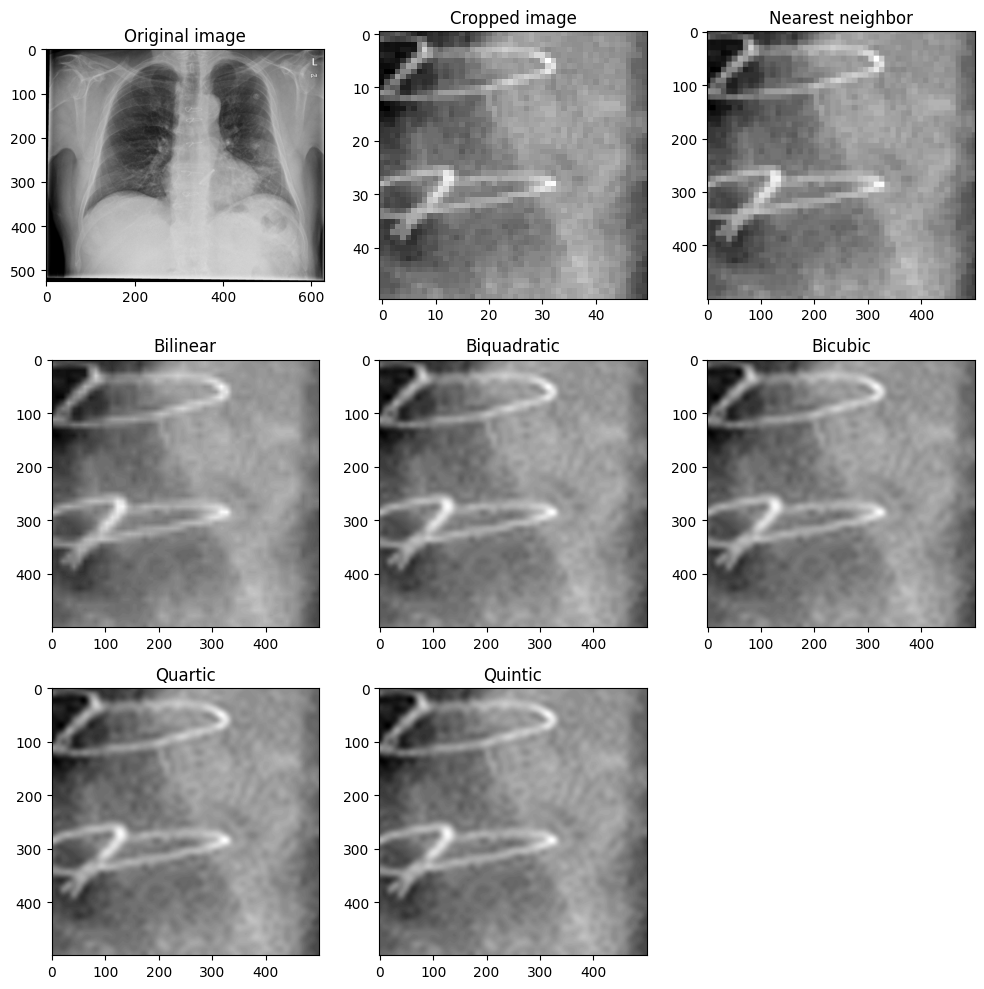

In [ ]:
from scipy.ndimage import zoom

# Image 1
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_1.jpeg'
# Define the crop region (columns, rows, width, height)
start_col, start_row, width, height = 320, 130, 50, 50

# Image 2
#image_path = '/content/drive/MyDrive/PIM/Images/DICOM_file_1.png'
# Define the crop region (columns, rows, width, height)
#start_col, start_row, width, height = 105, 115, 30, 30

# Load an image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Crop the image (using rows and columns)
cropped_image = image[start_row:start_row + height, start_col:start_col + width]

# Define the scaling factor for upsampling
zoom_factor = 10

# Perform different interpolation methods using scipy.ndimage.zoom
nearest = zoom(cropped_image, zoom=zoom_factor, order=0)      # Nearest-neighbor interpolation
bilinear = zoom(cropped_image, zoom=zoom_factor, order=1)     # Linear interpolation
biquadratic = zoom(cropped_image, zoom=zoom_factor, order=2)  # Quadratic spline interpolation
bicubic = zoom(cropped_image, zoom=zoom_factor, order=3)      # Cubic spline interpolation
quartic = zoom(cropped_image, zoom=zoom_factor, order=4)      # Quartic spline interpolation
quintic = zoom(cropped_image, zoom=zoom_factor, order=5)      # Quintic spline interpolation

# Create lists for the images and their titles
images = [image, cropped_image, nearest, bilinear, biquadratic, bicubic, quartic, quintic]
titles = ["Original image",
          "Cropped image",
          "Nearest neighbor",
          "Bilinear",
          "Biquadratic",
          "Bicubic",
          "Quartic",
          "Quintic"]

# Create a figure with a single row and five columns
plt.figure(figsize=(10, 10))

# Loop through the images and titles
for i in range(len(images)):
    plt.subplot(3, 3, i + 1)  # Create subplot at the i-th position
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])  # Set title

# Adjust layout and display
plt.tight_layout()
plt.show()

## References

* González, Rafael C., _Digital image processing: Chapter 2 (Digital Image Fundamentals)_. Prentice Hall,. 2018. 9780132345637

* Chityala, Ravishankar, _Image Processing and Acquisition Using Python: Chapter 6 (Affine Transformation)_. Chapman and Hall/CRC, 2022. 9780367531577

* Fernández Villán, Alberto, _Mastering OpenCV 4 with Python: Chapter 2 (Image Basics in OpenCV)_. Packt. 2019. 9781789344912

